# Sequence-to-Sequence Architecture


##Learning Objectives:
_____________
By the end of the lesson, all learners will be able to (minimum expected from everyone) :

- Introduce the basic structure of a Encoder Decoder Architecture

- Recall sequential learning problems occuring in a Neural Network 

- Discuss on sequence to sequence (seq2seq) networks and theoretically demonstrate the use of encoder embeddings for predictions in the decoder

##Prerequisites:
_____
To start this lesson **all students must be aware** of the following concepts:

- Sequential Learning

- RNN Networks


We have already discussed about the Recurrent Neural Networks(RNNs). They are a sequential network. Usually, in case of sequence modeling, the input and output dimensions are fixed. This creates a problem in the case of translation where the length of outputs and inputs are different.
This problem was needed to be addressed to improve the language translation. In order to address this issue, a new architecture was developed, called **Sequence to Sequence network.** The key idea is to learn the model over the sequence. Once the sequence ends, the input sends the **(End Of Sequence)** $\text{<EOS>}$ marker. The encoder will encode the input with $\text{<EOS>}$ into a context too. Then we will use this representation to generate a valid sequence along with $\text{<EOS>}$.

A sequence to sequence architecture is basically the many-to-many architecture of the Recurrent Neural Networks. And such architecture can map arbitary length input sequences to the arbitary length output sequence. Let's consider the following example:

Consider a German Sentence, $ich$ $gehe$ $zur$ $kirche$. When we translate it in English we get, $I$ $am$ $going$ $to$ $Church.$ Let's make a sequential architecture to understand this:

<div align="center">
<figure>


<p>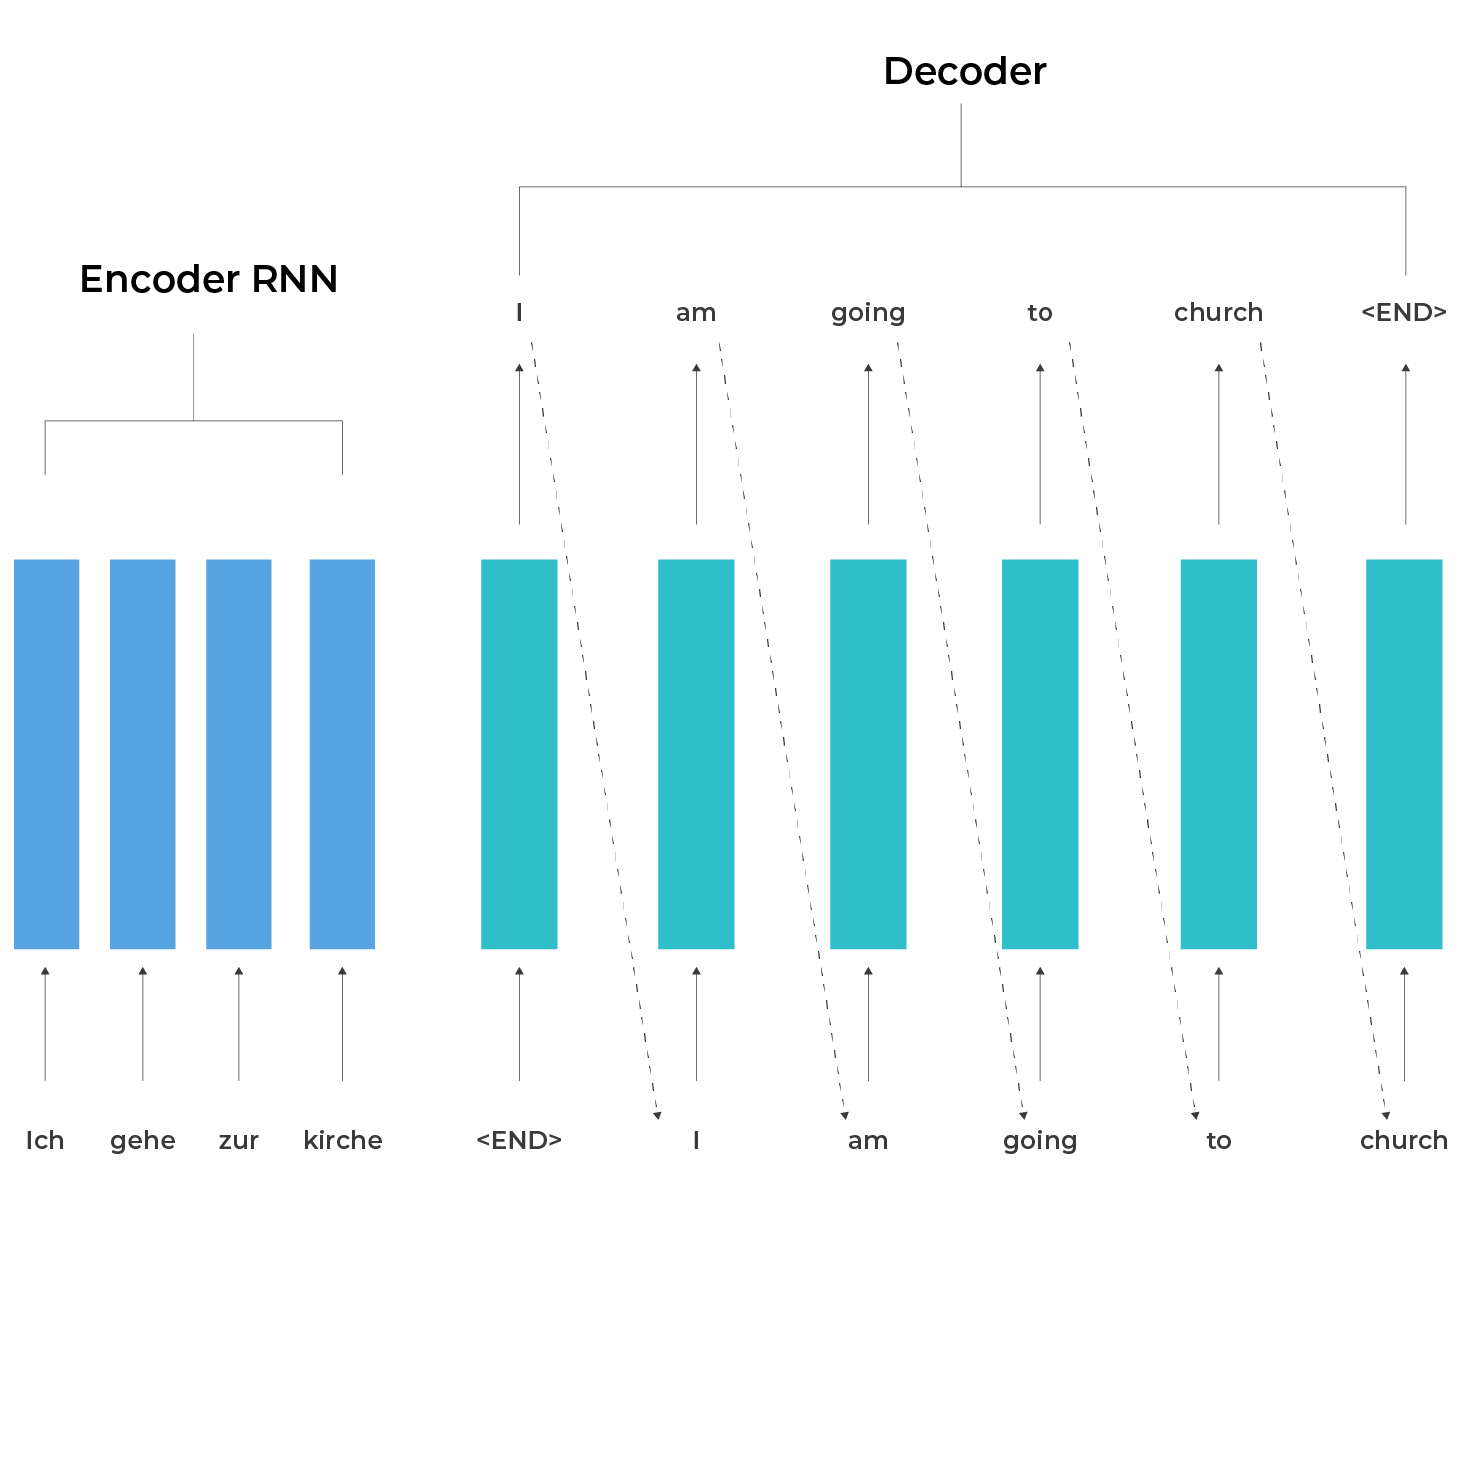</p>
<figcaption>Figure 1. A Sequential Architecture
</figcaption>
</figure>
</div>

Here, we can see that the input length and the output length should not be equal for the sequence to sequence architecture. Thus they are widely used in the applications where the inputs and output sequences are of different lengths. Some applications are: Machine Translation, Music Generation, Speech Generation, Chatbots, etc.


## Architecture

As we can see on the Figure 1, the sequence to sequence networks consists of a encoder-decoder combination. We have not discussed about the Encoders and Decoders but first let's have a general overview and then we will go on to dicussing them in depths too. 

Here, the encoder learns the overall representation of the input sentences. These representations are also called the **embeddings.** Talking about what a representation or an embedding is, they are just the vectors that comprise the meaning of the sentences. Because of this reason, they are also called a **Content Vector or a Thought Vector.**

After the encoder is finished with learning the embeddings, the embeddings are sent to the decoders. The primary work of the decoder is to decode the encoder embeddings into a target. In the Figure 1, the input to the network is the German sentence, the context vector is the embeddings or representation of the German sentence and the target is the corresponding English Sentence.


# Encoder-Decoder Architecture


### Basic Architecture


A encoder-decoder network consists of encoder that learns the representation of the input sequence and a decoder that learns to generate the required sequence based on the representation produced by the encoder. Let us talk more on encoders and decoders now with a simple figure demonstration.


<div align="center">
<figure>


<p>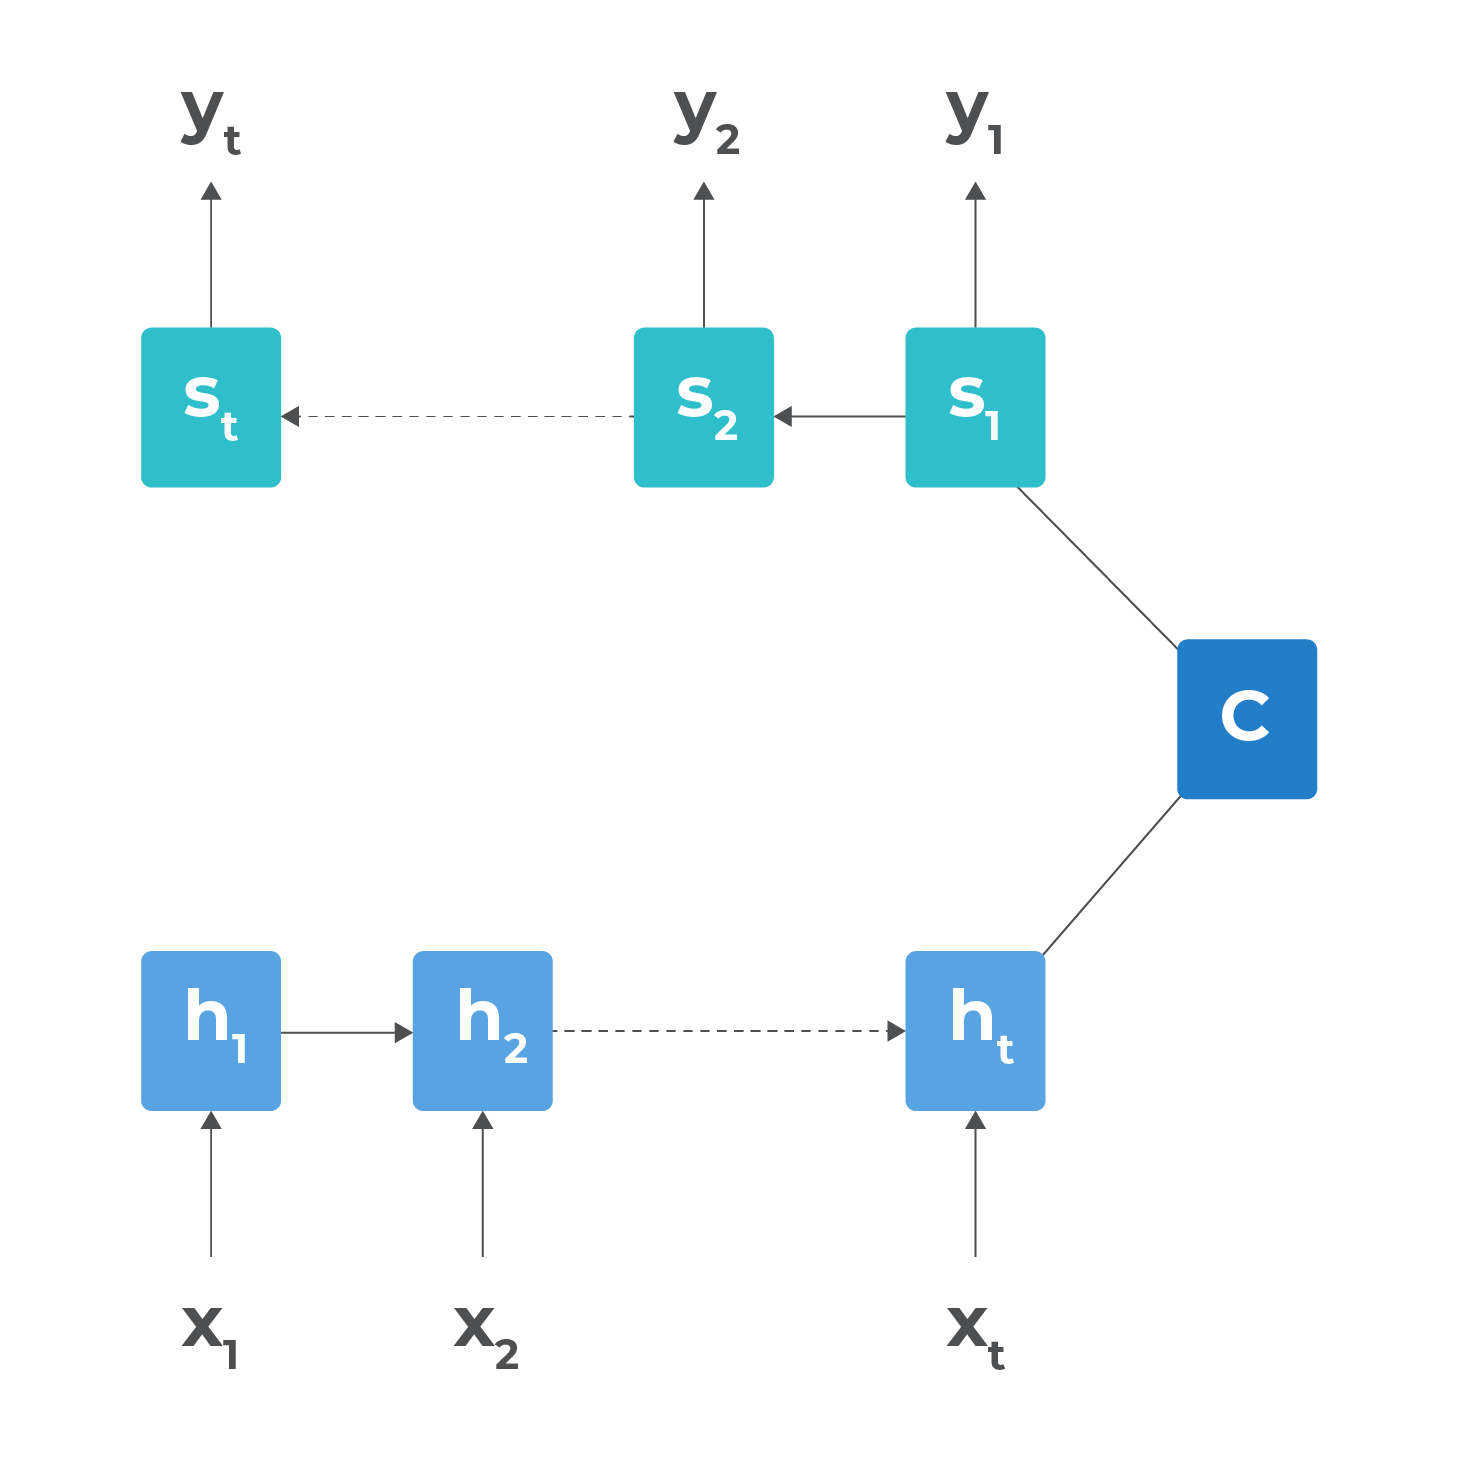</p>
<figcaption>Figure 2. An Encoder-Decoder Architecture
</figcaption>
</figure>
</div>

Let's discuss on Encoder and Decoders one by one.

#### Encoder

An encoder can be any sequential network, a RNN, LSTM or a GRU. The encoder in this architecture is an RNN that can read symbols from the input sequence $(x_1, x_2, ..., x_T)$. Once the network reads all the symbols present in the sequence it updates its hidden states and then generates a representation of context, $\pmb{c}$. This context vector $c$ is based on the whole input.  The hidden state is updated as:
$$
    \pmb{h_{(t)}} = f(\pmb{h_{t-1}}, x_t)
$$
Let's understand this with following demonstration.
<div align="center">
<figure>


<p>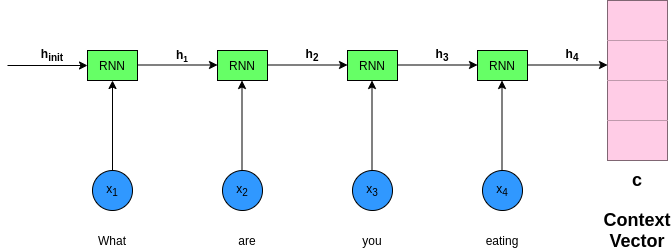</p>
<figcaption>Figure 3. An Encoder Architecture
</figcaption>
</figure>
</div>


From this figure, we can see how a context vector is calculated. In the first step, hidden state $h_1$ is calculated with the help of hidden states $x_1$ and $h_{init}$. In this way, the other hidden states $h_2$, $h_3$ and $h_4$ are calculated too. Here, the hidden state $h_4$ is the overall representation of the hidden states $h_1$, $h_2$ and $h_3$. This captures the contexts of all the words given as input at different time steps. Thus, it forms our embedding or the context vector as $c$. This context vector is fed as an input to the decoder which decodes it into the target sentence.


#### Decoder

The decoder architecture can be a RNN, LSTM or a GRU. Decoder uses the context vector and generates output sequence $(y_1, y_2, ..., y_T)$ based on the context vector and previous internal state. This means that $y_t$ is conditioned not only on $\pmb{h_{t-1}}$ but also on $y_{t-1}$ and $\pmb{c}$. Thus the hidden state of the decoder at time t is computed by, 
\begin{equation}
\pmb{h_{(t)}} = f(\pmb{h_{(t-1)}}, y_{(t-1)}, \pmb{c})
\end{equation}

<div align="center">
<figure>


<p>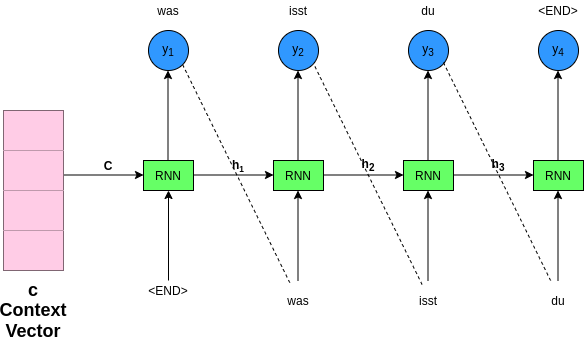</p>
<figcaption>Figure 4. A Decoder Architecture
</figcaption>
</figure>
</div>

From this figure we can understand the better representation of a decoder network.

Here, we can see that, initially, the input to the decoder network is context vector **$c$**. On every time steps $t$, the predicted output by the RNN cells $y_{t-1}$ are also fed as input to the next cell along with the previous hidden state $h_{t-1}$ and the current output prediction is obtained as $y_t$.

So, it is now clear that how a encoder decoder architecture work. It is necessary to know that decoder has to stop somewhere and finish the predictions. When the decoder predicts output words like: $\text{<EOS>}$, $\text{<SOS>}$ or $\text{<END>}$, this means that the sentence prediction is complete. The use of the end of sequence tags help decoder know that it has predicted a meanigful result from the context vector embeddings by the encoder.


Finally, we come to the end of the lesson and this is how sequential operations occur in an **encoder-decoder** architecture.



##**NOTE**
*To train encoder-decoder architecture, we can use teacher-forcing technique. In this technique, we pass the desired output instead of predicted output as the input to the next sequence in the decoder network. This is done to make the network learn quicker.*

<div align="center">
<figure>


<p>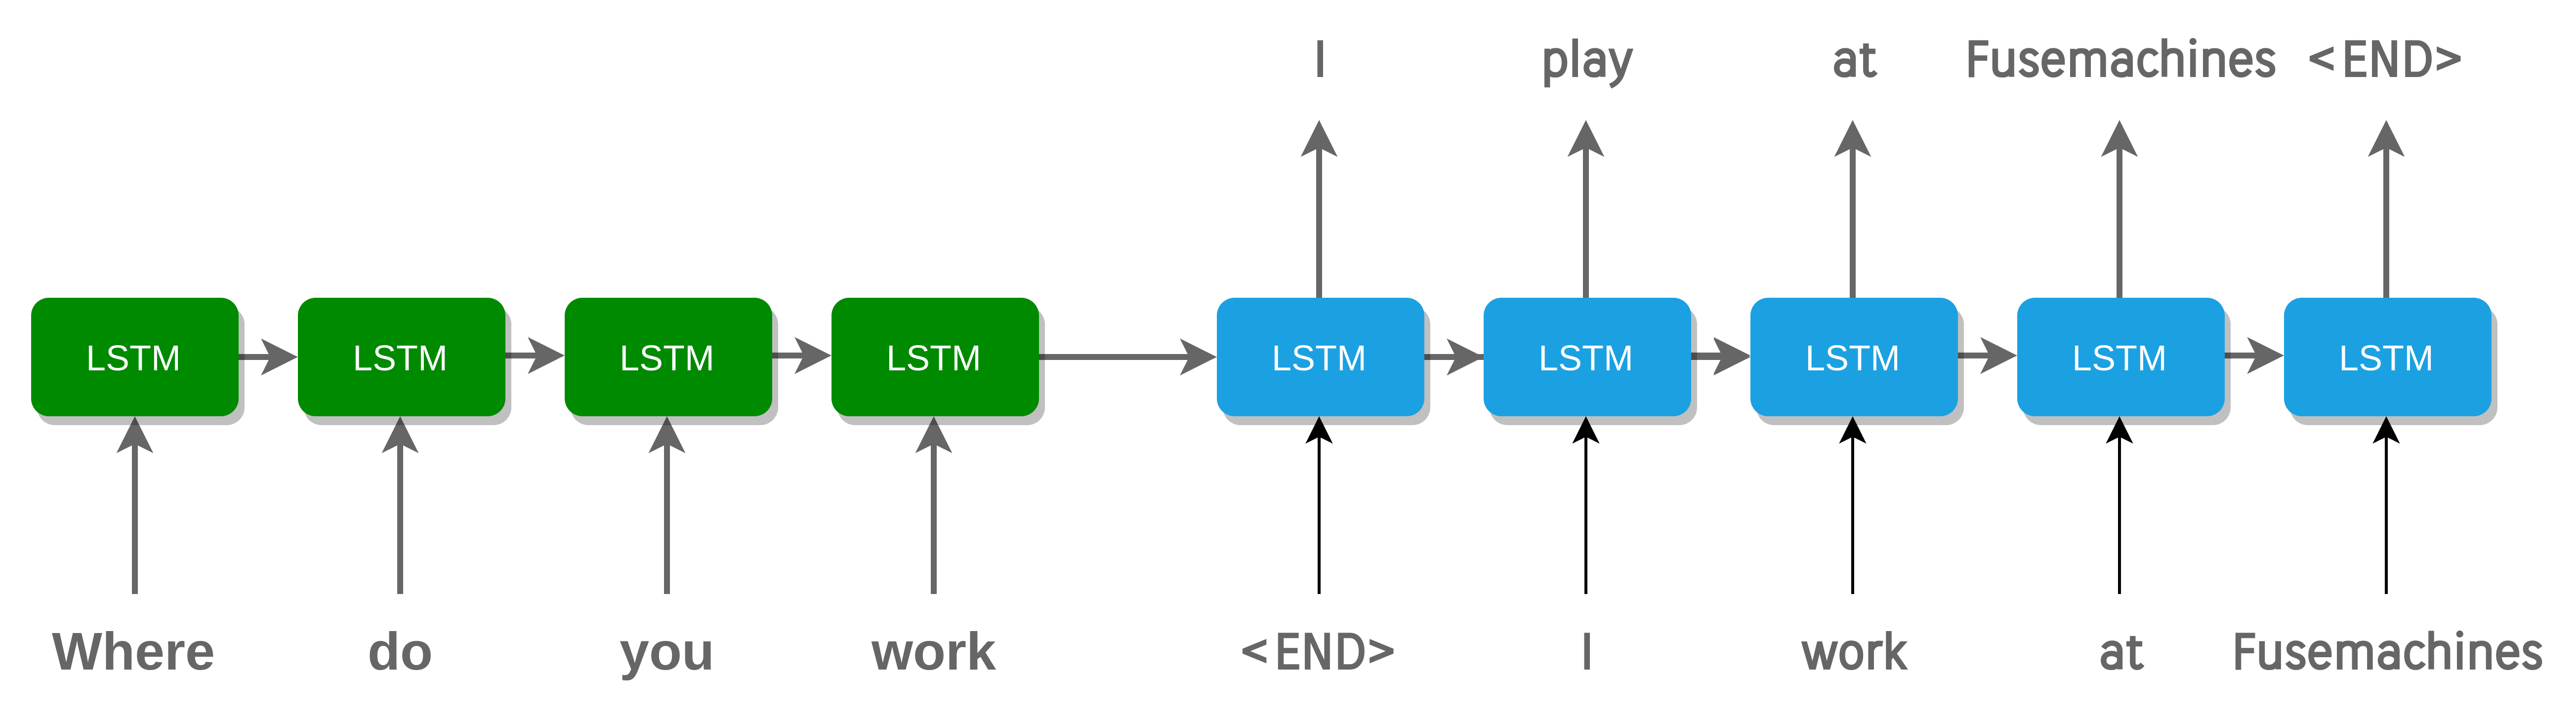</p>
<figcaption>Figure 5. Teacher Forcing
</figcaption>
</figure>
</div>

In the figure 5, we can see a question answering system. When we ask `Where do you work`, the machine replies sequentially. At first, it replies `I`, in the second timestep it replies `play`. But, `play` is not the verb we are looking for. So, in such cases while training a machine, we do not feed the output of current timestep as input to the next time step in teacher forcing technique. So, in this case instead of `play`, we send `work` as input to the next timestep and further predictions are made subsequently. In this way, the question answering machine replies `I work at Fusemachines` when the question `Where do you work` is asked.


# Takeaways
The main takeaways from this lesson are:

- Sequence to Sequence Networks can map arbitary length input sequences to the arbitary length output sequence.
- The sequence to sequence architecture consists of an encoder and a decoder network.
- The result of an encoder is a context vector or the representation of the inputs.
- The output from a decoder is the target sequence.


#References
[1] [Cho, Kyunghyun, et al. "Learning phrase representations using RNN encoder-decoder for statistical machine translation." arXiv preprint arXiv:1406.1078 (2014).](https://arxiv.org/abs/1406.1078)

[2] [Sutskever, Ilya, Oriol Vinyals, and Quoc V. Le. "Sequence to sequence learning with neural networks." Advances in neural information processing systems. 2014.](https://papers.nips.cc/paper/5346-sequence-to-sequence-learning-with-neural-networks.pdf)

